In [25]:
# In Google Colab, just run:
# Download the StudentsPerformance.csv file from the specified URL
!wget https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv
# Rename the downloaded file to student_data.csv
!mv StudentsPerformance.csv student_data.csv

--2025-12-09 08:32:50--  https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57021 (56K) [text/plain]
Saving to: ‘StudentsPerformance.csv’

StudentsPerformance 100%[===================>]  55.68K  --.-KB/s    in 0.01s   

2025-12-09 08:32:50 (4.26 MB/s) - ‘StudentsPerformance.csv’ saved [57021/57021]



In [26]:
# Step 1: Start PySpark
# Import SparkSession from pyspark.sql module
from pyspark.sql import SparkSession
# Create a SparkSession with the application name "BigDataTask"
spark = SparkSession.builder.appName("BigDataTask").getOrCreate()

# Step 2: Load your data
# Read the CSV file 'student_data.csv' into a PySpark DataFrame
# 'header=True' indicates that the first row of the CSV is the header
# 'inferSchema=True' tells Spark to automatically infer the data types of columns
df = spark.read.csv('student_data.csv', header=True, inferSchema=True)

# Step 3: See what you have
# Print the total number of rows in the DataFrame
print(f"Total rows: {df.count()}")
# Print the total number of columns in the DataFrame
print(f"Total columns: {len(df.columns)}")
# Show the first 5 rows of the DataFrame to inspect its content
df.show(5)  # Show first 5 rows

Total rows: 1000
Total columns: 8
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading score|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|           72|           74|
|female|       group C|               some college|    standard|              completed|        69|           90|           88|
|female|       group B|            master's degree|    standard|                   none|        90|           95|           93|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|           57|           44|
|  male|       group C|               some college|    standard|      

In [27]:
# 1. Basic statistics
# Display descriptive statistics for numerical columns in the DataFrame
df.describe().show()

# 2. Average scores by gender
# Import the 'avg' function from pyspark.sql.functions for aggregation
from pyspark.sql.functions import avg

# Group the DataFrame by 'gender' and calculate the average math, reading, and writing scores
avg_scores = df.groupBy('gender').agg(
    avg('math score').alias('avg_math'),
    avg('reading score').alias('avg_reading'),
    avg('writing score').alias('avg_writing')
)
# Display the average scores by gender
avg_scores.show()

# 3. Count by lunch type
# Group the DataFrame by 'lunch' type and count the occurrences of each type
lunch_counts = df.groupBy('lunch').count()
# Display the counts of each lunch type
lunch_counts.show()

# 4. Find top 10 math scores
# Order the DataFrame by 'math score' in descending order and limit to the top 10 rows
top_math = df.orderBy(df['math score'].desc()).limit(10)
# Display the top 10 students with highest math scores
top_math.show()

# 5. Simple filter: Students with math > 90
# Filter the DataFrame to include only students with a math score greater than 90
high_math = df.filter(df['math score'] > 90)
# Print the count of students who scored over 90 in math
print(f"Students with math > 90: {high_math.count()}")

+-------+------+--------------+---------------------------+------------+-----------------------+------------------+------------------+-----------------+
|summary|gender|race/ethnicity|parental level of education|       lunch|test preparation course|        math score|     reading score|    writing score|
+-------+------+--------------+---------------------------+------------+-----------------------+------------------+------------------+-----------------+
|  count|  1000|          1000|                       1000|        1000|                   1000|              1000|              1000|             1000|
|   mean|  NULL|          NULL|                       NULL|        NULL|                   NULL|            66.089|            69.169|           68.054|
| stddev|  NULL|          NULL|                       NULL|        NULL|                   NULL|15.163080096009454|14.600191937252223|15.19565701086966|
|    min|female|       group A|         associate's degree|free/reduced|          

In [28]:
# DEMO 1: Show PySpark can handle LOTS of data
# Illustrative print statements to emphasize PySpark's capability with large datasets
print("Regular Python/Pandas would struggle with millions of rows...")
print("But PySpark can handle it easily!")

# DEMO 2: Do operations on all 100,000 rows FAST
# Import the 'when' function for conditional expressions
from pyspark.sql.functions import when

# Add new column based on score
# Create a new column 'math_grade' based on the 'math score' using conditional logic
df = df.withColumn('math_grade',
    when(df['math score'] >= 90, 'A')
    .when(df['math score'] >= 80, 'B')
    .when(df['math score'] >= 70, 'C')
    .when(df['math score'] >= 60, 'D')
    .otherwise('F')
)

# Count grades
# Group the DataFrame by 'math_grade', count occurrences, and order by grade
grade_counts = df.groupBy('math_grade').count().orderBy('math_grade')
# Display the counts for each math grade
grade_counts.show()

# DEMO 3: Save processed data (shows you handled big data)
# Write the processed DataFrame (including the new 'math_grade' column) to a CSV file
# 'header=True' includes the column names in the output file
df.write.csv('processed_student_data', header=True, mode='overwrite')
# Confirm that the processed data has been saved
print("Saved processed data! This works for millions of rows too!")

Regular Python/Pandas would struggle with millions of rows...
But PySpark can handle it easily!
+----------+-----+
|math_grade|count|
+----------+-----+
|         A|   58|
|         B|  135|
|         C|  216|
|         D|  268|
|         F|  323|
+----------+-----+

Saved processed data! This works for millions of rows too!


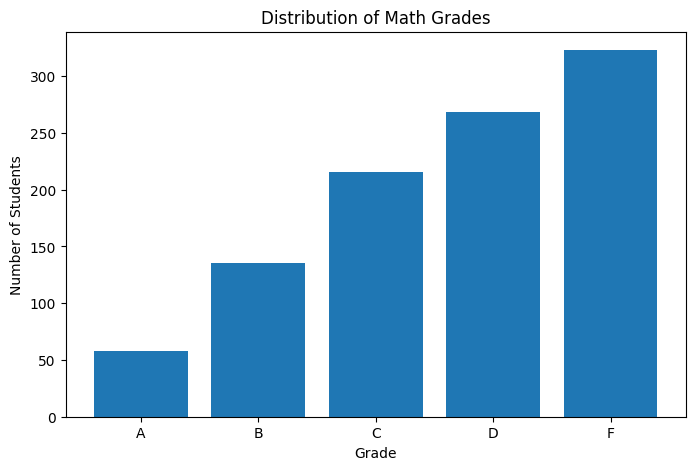

In [29]:
# Convert to Pandas for plotting (only for small samples!)
# Convert a limited sample (first 1000 rows) of the PySpark DataFrame to a Pandas DataFrame for plotting
sample_df = df.limit(1000).toPandas()

# Import the matplotlib.pyplot library for plotting
import matplotlib.pyplot as plt

# Simple bar chart
# Convert the 'grade_counts' PySpark DataFrame to a Pandas DataFrame for plotting
grade_counts_pd = grade_counts.toPandas()
# Create a new figure with a specified size
plt.figure(figsize=(8,5))
# Generate a bar chart using 'math_grade' for x-axis and 'count' for y-axis
plt.bar(grade_counts_pd['math_grade'], grade_counts_pd['count'])
# Set the title of the plot
plt.title('Distribution of Math Grades')
# Set the label for the x-axis
plt.xlabel('Grade')
# Set the label for the y-axis
plt.ylabel('Number of Students')
# Display the plot
plt.show()